In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

practice1

In [47]:
#設定參數
#自己設定
true_a = 2.0
true_b = 1.0
#題目要求
sigma0 = 3.0
x = np.linspace(1, 10, 10)
num_sets = 2000

In [51]:
#擬合函數
def linear_func(x, a, b):
    return a * x + b

#儲存變數
a_list = []
b_list = []
fit_results = []
all_data = []
chi2_values = []

In [52]:
#產生資料&擬合
for i in range(num_sets):
    noise = np.random.normal(0, sigma0, size=len(x))
    y = true_a * x + true_b + noise
    all_data.append(y)

    popt, _ = curve_fit(linear_func, x, y)
    fit_y = linear_func(x, *popt)
    fit_results.append(popt)
    #為practice 3做準備
    a_list.append(popt[0])
    b_list.append(popt[1])
    #計算
    residuals = y - fit_y
    chi2_i = np.sum((residuals / sigma0)**2)
    chi2_values.append(chi2_i)

    # 印出全部結果
    print(f"第 {i+1} 組：a = {popt[0]:.4f}, b = {popt[1]:.4f}, χ² = {chi2_i:.4f}")


第 1 組：a = 1.8574, b = 1.8237, χ² = 8.5522
第 2 組：a = 2.2887, b = -0.5117, χ² = 8.6499
第 3 組：a = 1.6383, b = 2.5132, χ² = 4.2159
第 4 組：a = 2.1835, b = -0.0599, χ² = 6.5635
第 5 組：a = 2.0979, b = 2.7551, χ² = 7.0948
第 6 組：a = 2.3218, b = -0.8963, χ² = 11.7131
第 7 組：a = 2.1853, b = -0.3963, χ² = 5.2027
第 8 組：a = 2.5256, b = -2.0762, χ² = 3.2217
第 9 組：a = 1.9371, b = 1.6019, χ² = 9.3381
第 10 組：a = 1.6203, b = 4.8335, χ² = 7.4414
第 11 組：a = 2.2317, b = -1.1538, χ² = 8.0340
第 12 組：a = 1.7627, b = 1.5495, χ² = 4.3345
第 13 組：a = 2.0941, b = 0.5582, χ² = 8.0356
第 14 組：a = 1.6353, b = 2.8677, χ² = 1.5856
第 15 組：a = 1.7580, b = 2.2216, χ² = 9.3616
第 16 組：a = 2.5904, b = -2.6203, χ² = 7.7151
第 17 組：a = 2.0070, b = 0.5941, χ² = 6.3891
第 18 組：a = 2.0440, b = -1.0461, χ² = 8.1972
第 19 組：a = 1.5520, b = 3.4791, χ² = 9.2246
第 20 組：a = 1.7393, b = 3.1151, χ² = 11.6923
第 21 組：a = 2.4026, b = -1.8123, χ² = 4.6559
第 22 組：a = 1.8362, b = 1.6101, χ² = 4.9080
第 23 組：a = 1.8270, b = 1.7907, χ² = 7.0532
第 24 組：a 

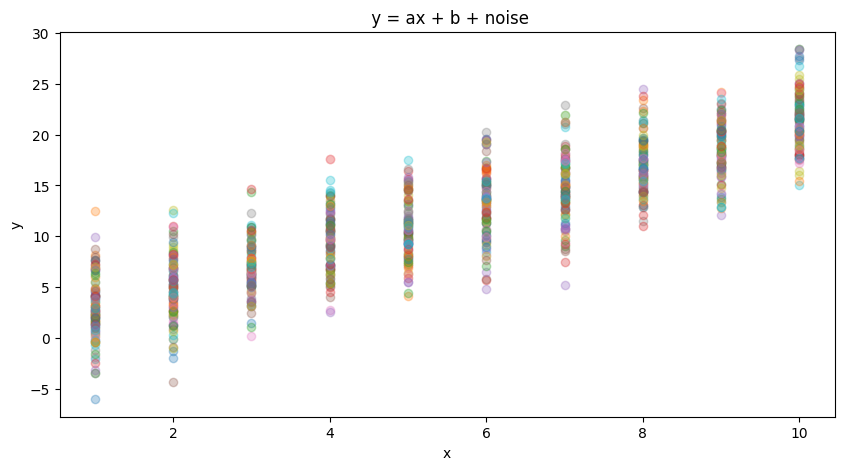

In [35]:
# 畫出資料點
plt.figure(figsize=(10, 5))
for i in range(100): 
    plt.plot(x, all_data[i], 'o', alpha=0.3)
    #plt.plot(x, all_data[i], 'o', color='gray', alpha=0.3)
plt.title(' y = ax + b + noise')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("output1_1.pdf", transparent=True)
plt.show()

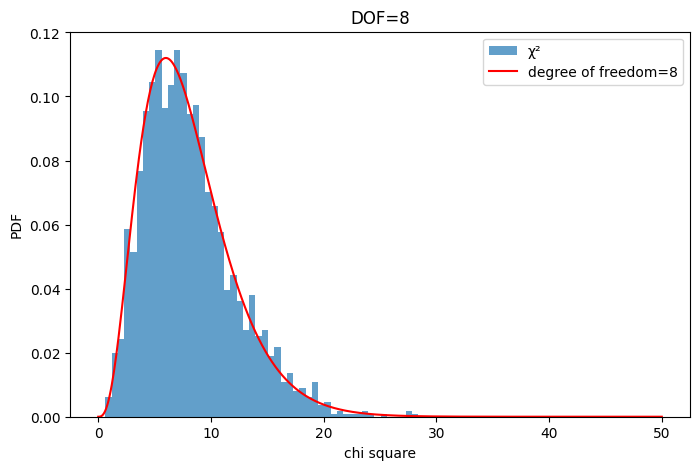

In [36]:
#chi square直方圖
plt.figure(figsize=(8, 5))
plt.hist(chi2_values, bins=50, density=True, alpha=0.7, label='χ²')
x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=8), 'r-', label='degree of freedom=8')
plt.title('DOF=8')
plt.xlabel('chi square')
plt.ylabel('PDF')
plt.legend()
plt.savefig("output1_2.pdf", transparent=True)
plt.show()

practice 2

In [37]:
#假設chi2_values和fit_results是前面已算好的list
chi2_values = np.array(chi2_values)
fit_results = np.array(fit_results)

#根據chi square值排序，取得排序後的索引
sorted_indices = np.argsort(chi2_values)

#將排序後的擬合參數依區段分成五區（每區400組）
num_per_group = 400
a_groups = []
b_groups = []

for i in range(5):
    #取出這一區的index
    idx = sorted_indices[i * num_per_group : (i + 1) * num_per_group]
    a_groups.append(fit_results[idx, 0])  #取出a值
    b_groups.append(fit_results[idx, 1])  #取出b值


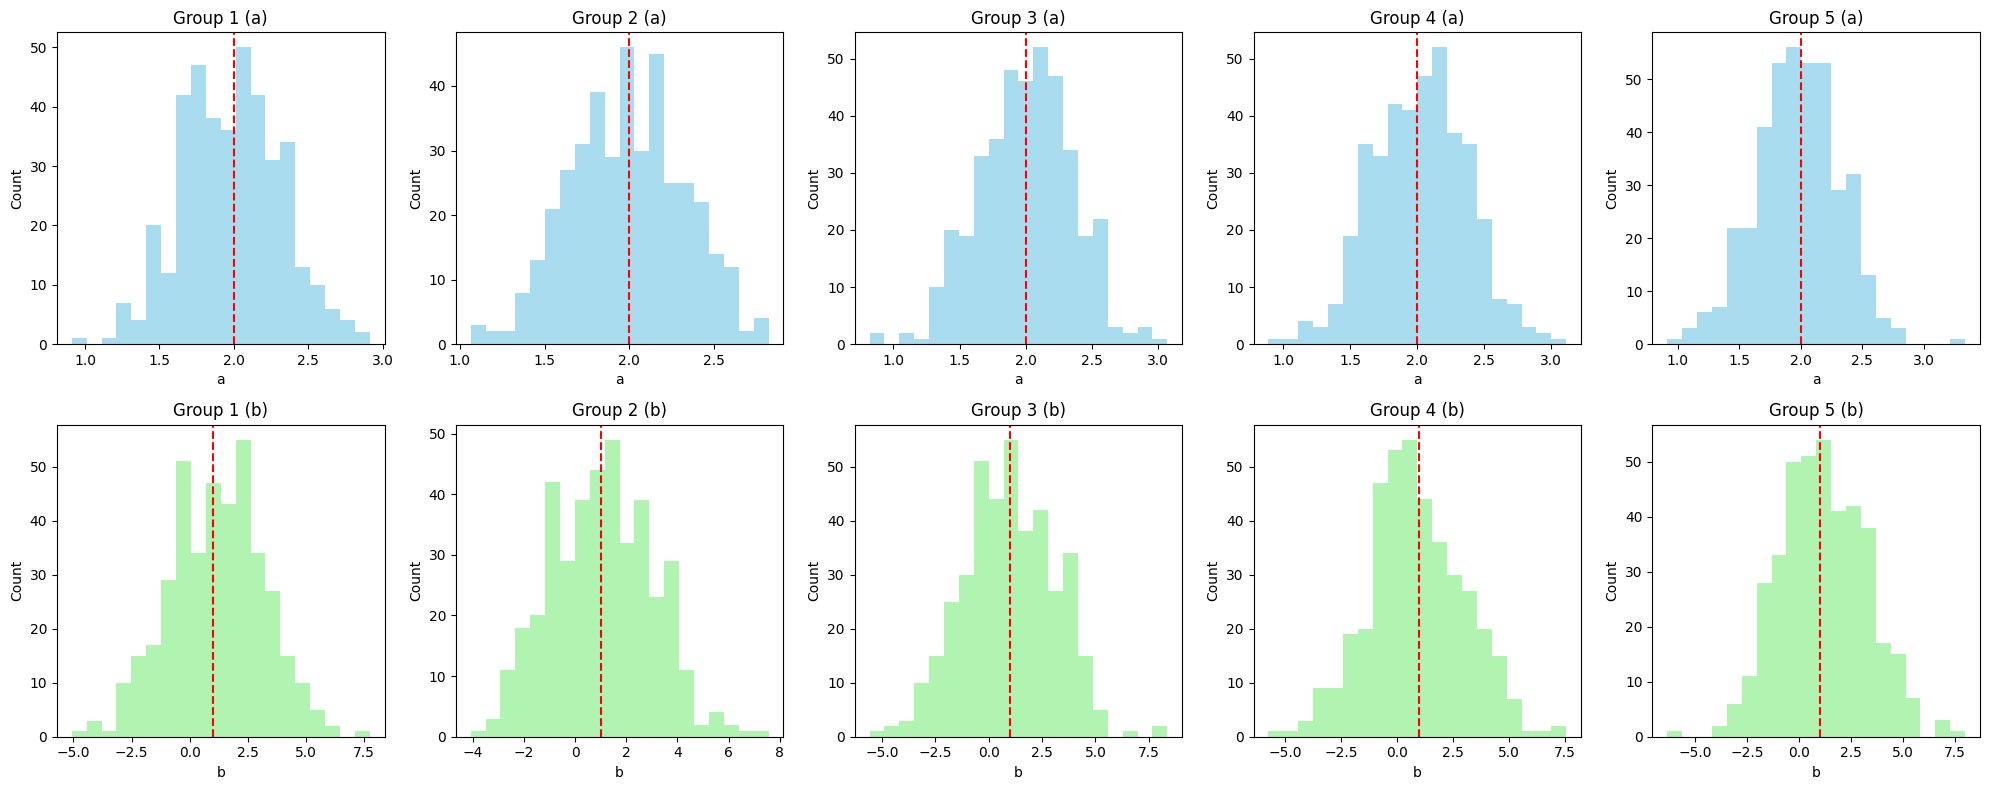

In [38]:
#畫出每一區的a和b直方圖
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(5):
    axs[0, i].hist(a_groups[i], bins=20, alpha=0.7, color='skyblue')
    axs[0, i].axvline(true_a, color='r', linestyle='--', label='True a')
    axs[0, i].set_title(f'Group {i+1} (a)')
    axs[0, i].set_xlabel('a')
    axs[0, i].set_ylabel('Count')

    axs[1, i].hist(b_groups[i], bins=20, alpha=0.7, color='lightgreen')
    axs[1, i].axvline(true_b, color='r', linestyle='--', label='True b')
    axs[1, i].set_title(f'Group {i+1} (b)')
    axs[1, i].set_xlabel('b')
    axs[1, i].set_ylabel('Count')
    

plt.tight_layout()
plt.savefig("output2_1.pdf", transparent=True)
#plt.axvline(np.mean(a_groups[i]), color='orange', linestyle='--', label='Mean a')
plt.show()


practice 3

In [69]:
a_list = np.array(a_list)
b_list = np.array(b_list)

In [70]:
#對每個x值，計算y的平均與標準差
y_all = np.array(all_data)  #shape = (2000, 10)
y_mean = np.mean(y_all, axis=0)  #對2000組取平均
y_std = np.std(y_all, axis=0, ddof=1)  #標準差

#x軸（每組共用）
x = np.linspace(1, 10, 10)

#使用y_mean擬合線性模型
def linear_model(x, a, b):
    return a * x + b



In [71]:
params, cov_matrix = curve_fit(linear_model, x, y_mean, sigma=y_std, absolute_sigma=True)
a_fit, b_fit = params

print(f"線性擬合參數: a = {a_fit:.3f}, b = {b_fit:.3f}")
print("共變異數矩陣:")
print(cov_matrix)
#[0, 0] represents the variance of a (slope)
#[1, 1] represents the variance of b (intercept)
#[0, 1] or [1, 0] represents the covariance between a and b, indicating how changes in a relate to changes in b.
#This indicates that when slope a increases, intercept b tends to decrease — a typical compensation relationship between linear parameters.

線性擬合參數: a = 1.998, b = 1.045
共變異數矩陣:
[[ 0.10684063 -0.5884187 ]
 [-0.5884187   4.12323395]]


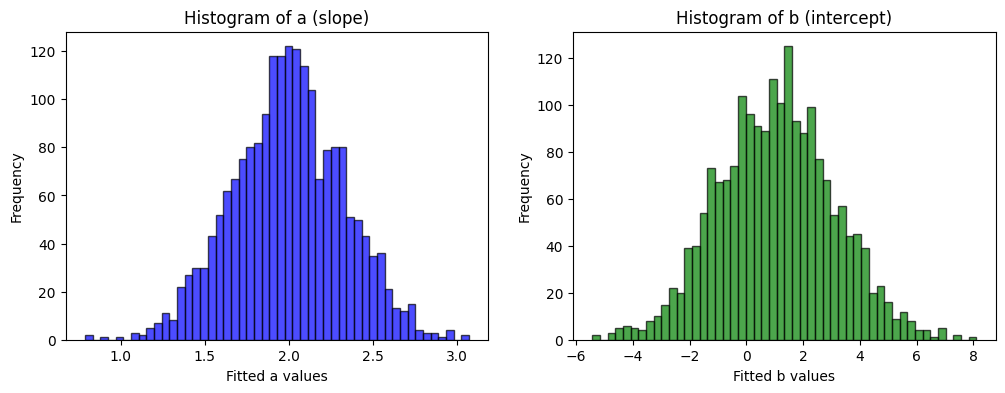

In [72]:
#繪製a與b的直方圖與2D直方圖
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(a_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Fitted a values")
plt.ylabel("Frequency")
plt.title("Histogram of a (slope)")
#plt.savefig("output.3_1.pdf", transparent=True)

plt.subplot(1, 2, 2)
plt.hist(b_list, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.xlabel("Fitted b values")
plt.ylabel("Frequency")
plt.title("Histogram of b (intercept)")
plt.savefig("output.3_1.pdf", transparent=True)
plt.show()

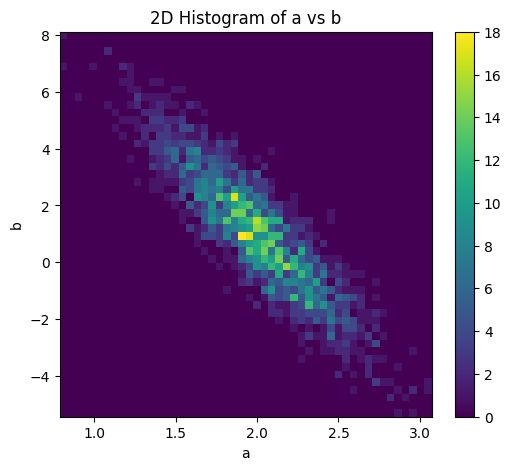

In [73]:
#2D直方圖
plt.figure(figsize=(6, 5))
hist2d = plt.hist2d(a_list, b_list, bins=50, cmap='viridis')
plt.xlabel("a")
plt.ylabel("b")
plt.title("2D Histogram of a vs b")
plt.colorbar()
plt.savefig("output.3_2.pdf", transparent=True)
plt.show()

In [74]:
#計算共變異數與相關係數
cov_ab = np.cov(a_list, b_list)
corr_ab = np.corrcoef(a_list, b_list)

print("Covariance matrix of [a, b]:")
print(cov_ab)
print("Correlation coefficient matrix of [a, b]:")
print(corr_ab)

#擬合a vs b的關係線，觀察是否線性
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(a_list, b_list)

print(f"Linear fit b = m * a + c:\nSlope = {slope:.3f}, Intercept = {intercept:.3f}")
print(f"Correlation coefficient (r) = {r_value:.3f}, R² = {r_value**2:.3f}")

Covariance matrix of [a, b]:
[[ 0.10863151 -0.5958884 ]
 [-0.5958884   4.17010433]]
Correlation coefficient matrix of [a, b]:
[[ 1.         -0.88534709]
 [-0.88534709  1.        ]]
Linear fit b = m * a + c:
Slope = -5.485, Intercept = 12.004
Correlation coefficient (r) = -0.885, R² = 0.784
